In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp
import seaborn as sns

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')

Using cuda


In [3]:
data = pd.read_csv('data.csv').to_numpy()
data = (data - data.mean(axis=1).reshape(-1, 1)) / data.std(axis=1).reshape(-1, 1)

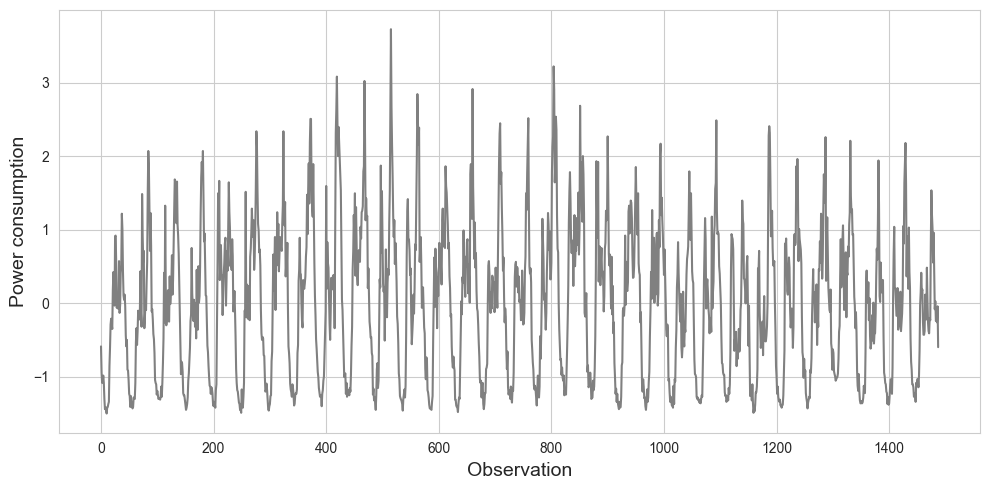

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data[0], color='gray')
ax.set_xlabel('Observation', fontsize=14)
ax.set_ylabel('Power consumption', fontsize=14)
plt.tight_layout()

In [5]:
train_length = round(len(data) * 0.8)
train_data = torch.tensor(data[:train_length], dtype=torch.float32)
test_data = torch.tensor(data[train_length:], dtype=torch.float32)
all_data = torch.tensor(data, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(train_data), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data), batch_size=16, shuffle=False)
all_loader = DataLoader(TensorDataset(all_data), batch_size=16, shuffle=True)

In [15]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim, d1, d2):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, d1),
            nn.ReLU(),
            nn.Linear(d1, d2),
            nn.ReLU(),
            nn.Linear(d2, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, d2),
            nn.ReLU(),
            nn.Linear(d2, d1),
            nn.ReLU(),
            nn.Linear(d1, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [28]:
# Создание модели
model = Autoencoder(input_dim=1488, encoding_dim=48, d1=156, d2=84).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [29]:
k = 0
for param in model.parameters():
    if param.requires_grad:
        k += torch.prod(torch.tensor(param.size()))
print(f'Model has {k} trainable parameters')

Model has 500544 trainable parameters


In [30]:
all_train_losses = []
train_losses = []
test_losses = []

In [35]:
epochs = 30

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in train_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        all_train_losses.append(loss.item())
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')
    train_losses.append(avg_loss)
    
    model.eval()
    avg_test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch[0].to(device)
            preds = model(batch)
            loss = criterion(preds, batch)
            
            avg_test_loss += loss.item()
    avg_test_loss /= len(test_loader)
    test_losses.append(avg_test_loss)
    print(f'Test Loss: {avg_test_loss:.4f}')

Epoch 1, Loss: 0.3090
Test Loss: 0.3340
Epoch 2, Loss: 0.3105
Test Loss: 0.3347
Epoch 3, Loss: 0.3082
Test Loss: 0.3339
Epoch 4, Loss: 0.3064
Test Loss: 0.3334
Epoch 5, Loss: 0.3053
Test Loss: 0.3331
Epoch 6, Loss: 0.3044
Test Loss: 0.3330
Epoch 7, Loss: 0.3039
Test Loss: 0.3323
Epoch 8, Loss: 0.3039
Test Loss: 0.3323
Epoch 9, Loss: 0.3031
Test Loss: 0.3320
Epoch 10, Loss: 0.3041
Test Loss: 0.3324
Epoch 11, Loss: 0.3016
Test Loss: 0.3319
Epoch 12, Loss: 0.3008
Test Loss: 0.3315
Epoch 13, Loss: 0.3019
Test Loss: 0.3317
Epoch 14, Loss: 0.3006
Test Loss: 0.3317
Epoch 15, Loss: 0.3004
Test Loss: 0.3323
Epoch 16, Loss: 0.2990
Test Loss: 0.3315
Epoch 17, Loss: 0.2978
Test Loss: 0.3321
Epoch 18, Loss: 0.3012
Test Loss: 0.3317
Epoch 19, Loss: 0.2985
Test Loss: 0.3312
Epoch 20, Loss: 0.2981
Test Loss: 0.3323
Epoch 21, Loss: 0.2963
Test Loss: 0.3313
Epoch 22, Loss: 0.2974
Test Loss: 0.3313
Epoch 23, Loss: 0.2972
Test Loss: 0.3307
Epoch 24, Loss: 0.2977
Test Loss: 0.3311
Epoch 25, Loss: 0.2953
Te

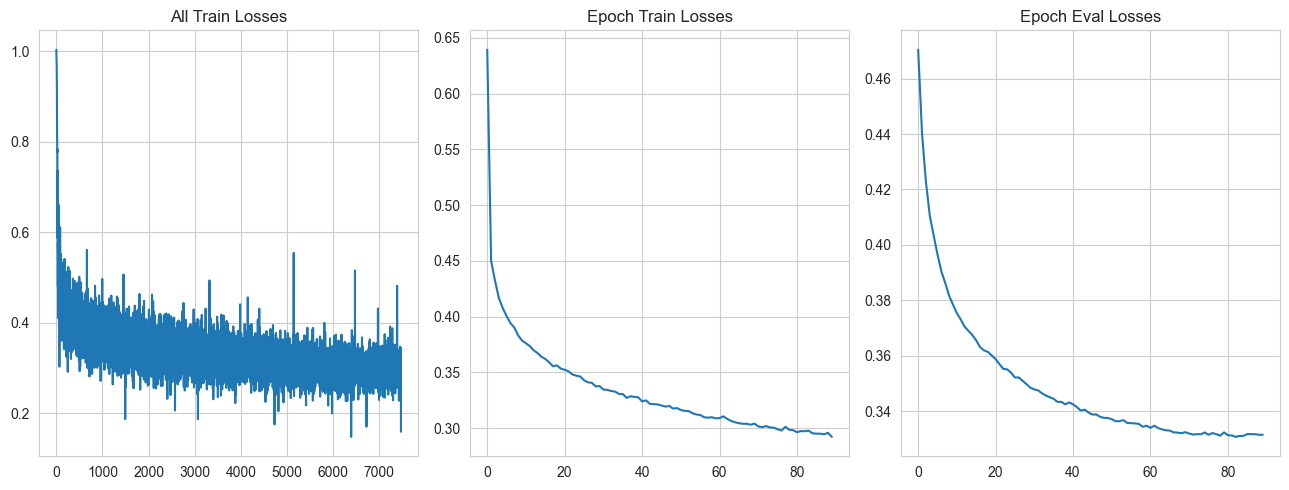

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
axes[0].plot(all_train_losses)
axes[0].set_title('All Train Losses')
axes[1].plot(train_losses)
axes[1].set_title('Epoch Train Losses')
axes[2].plot(test_losses)
axes[2].set_title('Epoch Eval Losses')
plt.tight_layout()
plt.show()

In [38]:
# Создание модели
model = Autoencoder(input_dim=1488, encoding_dim=48, d1=156, d2=84).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [39]:
k = 0
for param in model.parameters():
    if param.requires_grad:
        k += torch.prod(torch.tensor(param.size()))
print(f'Model has {k} trainable parameters')

Model has 500544 trainable parameters


In [40]:
epochs = 70

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in all_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 0.7444
Epoch 2, Loss: 0.5499
Epoch 3, Loss: 0.5271
Epoch 4, Loss: 0.5103
Epoch 5, Loss: 0.4979
Epoch 6, Loss: 0.4876
Epoch 7, Loss: 0.4799
Epoch 8, Loss: 0.4728
Epoch 9, Loss: 0.4672
Epoch 10, Loss: 0.4621
Epoch 11, Loss: 0.4580
Epoch 12, Loss: 0.4537
Epoch 13, Loss: 0.4505
Epoch 14, Loss: 0.4474
Epoch 15, Loss: 0.4446
Epoch 16, Loss: 0.4414
Epoch 17, Loss: 0.4391
Epoch 18, Loss: 0.4361
Epoch 19, Loss: 0.4335
Epoch 20, Loss: 0.4317
Epoch 21, Loss: 0.4290
Epoch 22, Loss: 0.4268
Epoch 23, Loss: 0.4246
Epoch 24, Loss: 0.4227
Epoch 25, Loss: 0.4206
Epoch 26, Loss: 0.4189
Epoch 27, Loss: 0.4172
Epoch 28, Loss: 0.4150
Epoch 29, Loss: 0.4135
Epoch 30, Loss: 0.4121
Epoch 31, Loss: 0.4107
Epoch 32, Loss: 0.4089
Epoch 33, Loss: 0.4074
Epoch 34, Loss: 0.4059
Epoch 35, Loss: 0.4047
Epoch 36, Loss: 0.4038
Epoch 37, Loss: 0.4020
Epoch 38, Loss: 0.4017
Epoch 39, Loss: 0.4002
Epoch 40, Loss: 0.3990
Epoch 41, Loss: 0.3977
Epoch 42, Loss: 0.3967
Epoch 43, Loss: 0.3950
Epoch 44, Loss: 0.39

In [41]:
errors = []
encoded = []
reconstructed = []
with torch.no_grad():
    for sample in all_data:
        inputs = sample.view(1, 1, -1).to(device)
        res = model(inputs).cpu().detach().flatten()
        reconstruction_error = criterion(res, sample)
        errors.append(reconstruction_error.numpy())

        features = model.encoder(inputs).view(-1)
        encoded.append(features.cpu().detach().numpy())

        reconstructed.append(res.view(-1).cpu().detach().numpy())

errors = np.array(errors)
encoded = np.array(encoded)
reconstructed = np.array(reconstructed)

In [72]:
def plot_sample(sample):
    _, ax = plt.subplots(figsize=(20, 5))
    ax.plot(data[sample], label='True Row')
    pred_row = reconstructed[sample]
    ax.plot(pred_row, label='Predicted Row')
    mse = np.linalg.norm(data[sample] - pred_row) ** 2 / len(data[sample])
    ax.set_title(f'Model Prediction VS True Row, MSE: {mse.round(2)}, Sample: {sample}')
    plt.legend()
    plt.show()

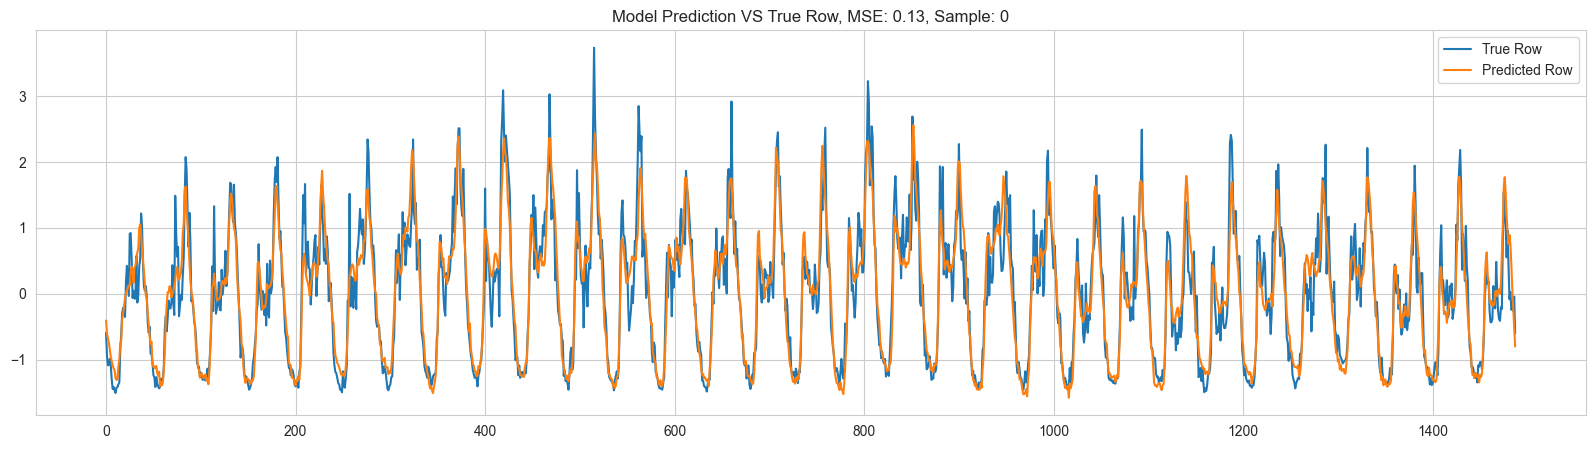

In [73]:
plot_sample(0)

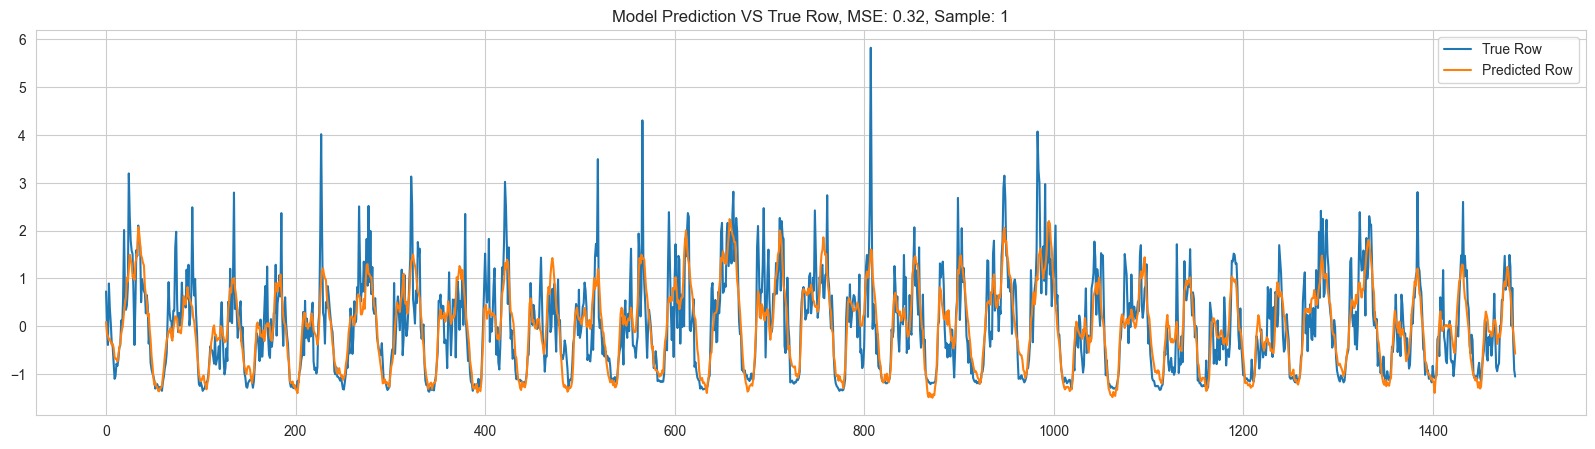

In [44]:
plot_sample(1)

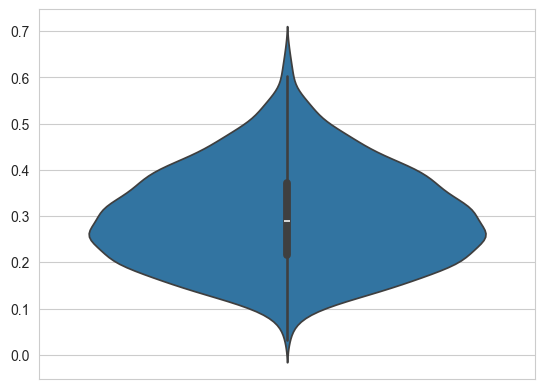

In [45]:
sns.violinplot(errors)
plt.show()

In [46]:
np.quantile(errors, 0.99)

0.5619604921340942

In [47]:
np.column_stack((np.argsort(-errors), -np.sort(-errors)))

array([[3.94000000e+02, 6.61886454e-01],
       [1.03400000e+03, 6.57286763e-01],
       [1.42000000e+02, 6.31706059e-01],
       ...,
       [1.10200000e+03, 5.26085161e-02],
       [6.54000000e+02, 3.65777127e-02],
       [2.23000000e+02, 3.29686292e-02]])

In [ ]:
# 394.0,0.661886
# 1034.0,0.657287
# 142.0,0.631706
# 383.0,0.629798
# 380.0,0.621084
# 908.0,0.620830
# 584.0,0.603259
# 787.0,0.598092
# 339.0,0.597429
# 1225.0,0.597262

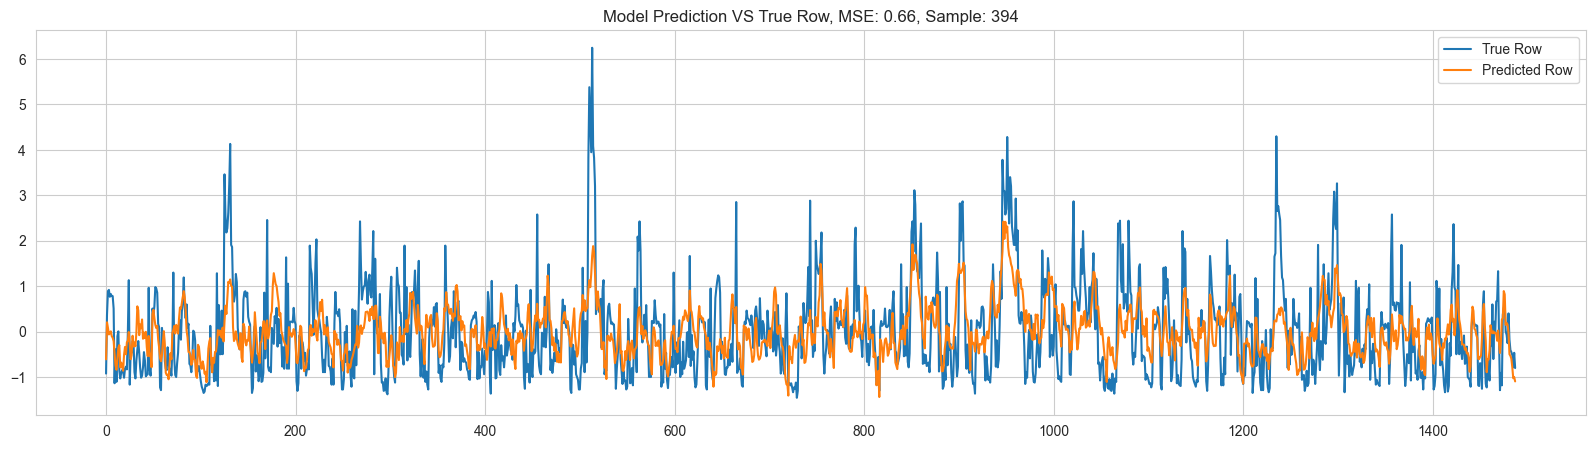

In [48]:
plot_sample(394)

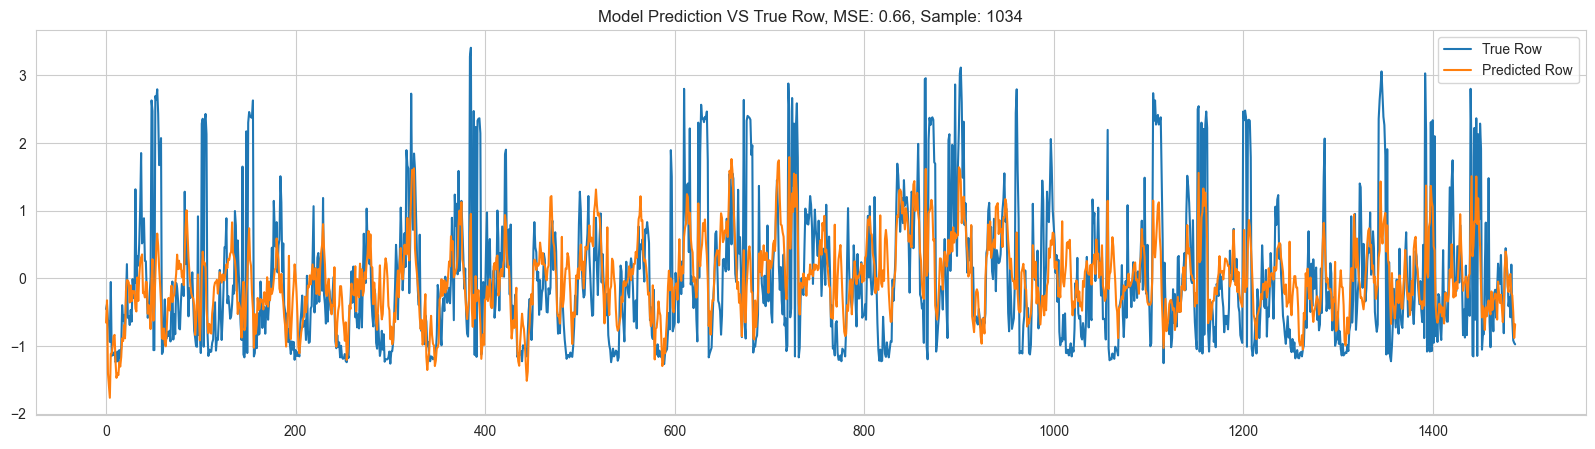

In [49]:
plot_sample(1034)

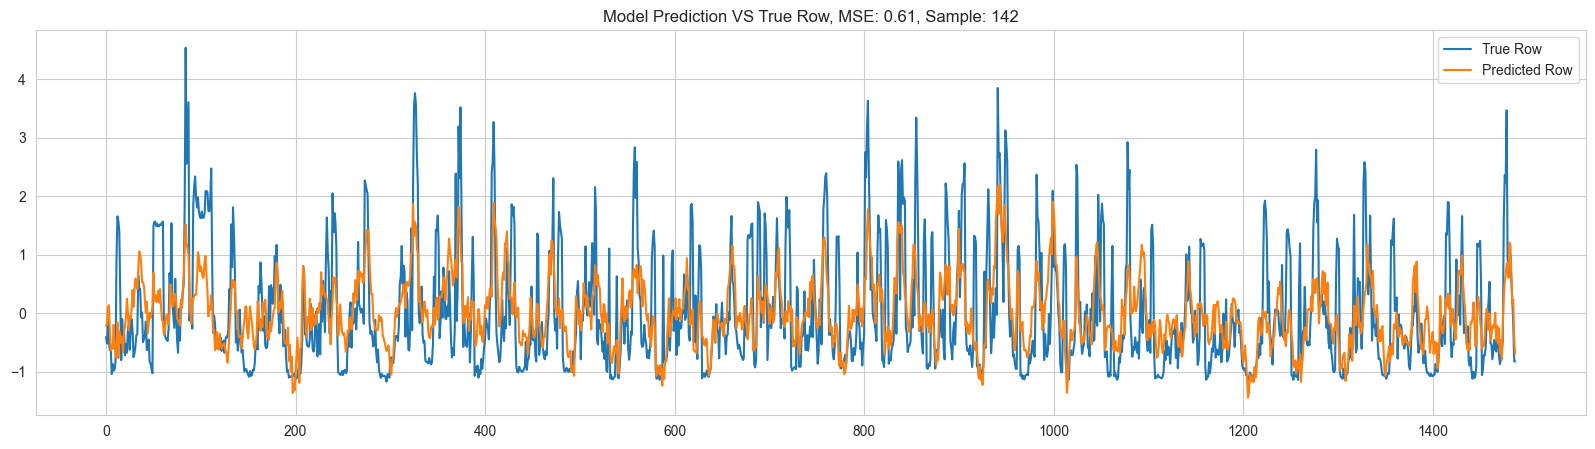

In [44]:
plot_sample(142)

In [50]:
encoded_norm = (encoded - encoded.mean(axis=0)) / encoded.std(axis=0)

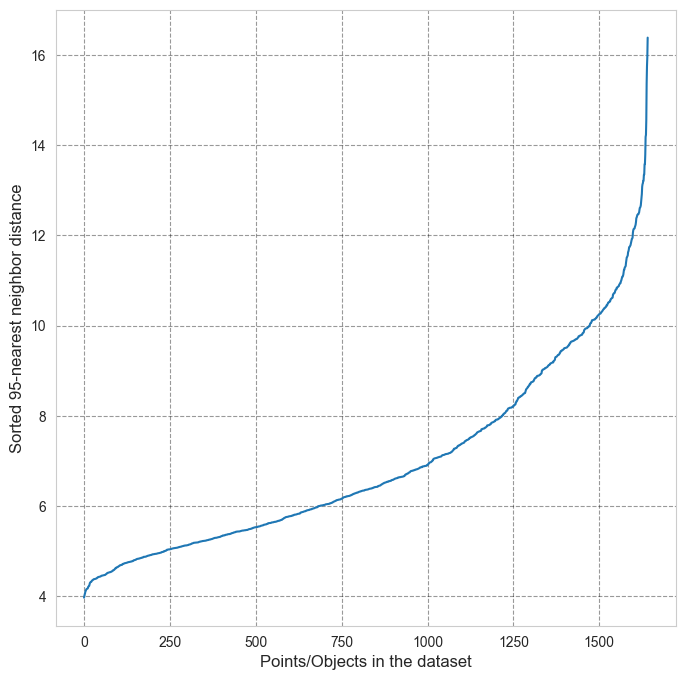

In [51]:
from sklearn.neighbors import NearestNeighbors


def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * encoded_norm.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=encoded_norm, k=k)

In [60]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=10.9, min_samples=10)

# Проводим кластеризацию данных
clusters = dbscan.fit_predict(encoded_norm)

# Ищем объекты, отнесенные к кластеру -1 (это аномалии)
anomalies_indices = np.where(clusters == -1)[0]
anomalies_indices

array([   4,  146,  393,  412,  603,  693,  950, 1167, 1416, 1443],
      dtype=int64)

In [ ]:
# 4,  146,  393,  412,  603,  693,  950, 1167, 1416, 1443

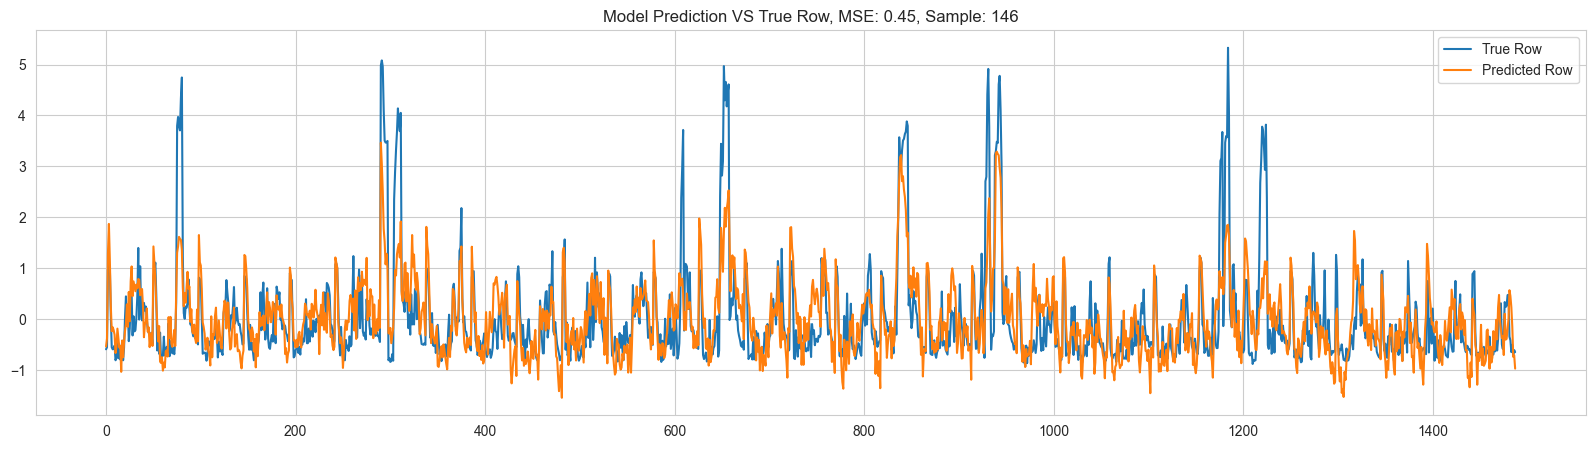

In [61]:
plot_sample(146)

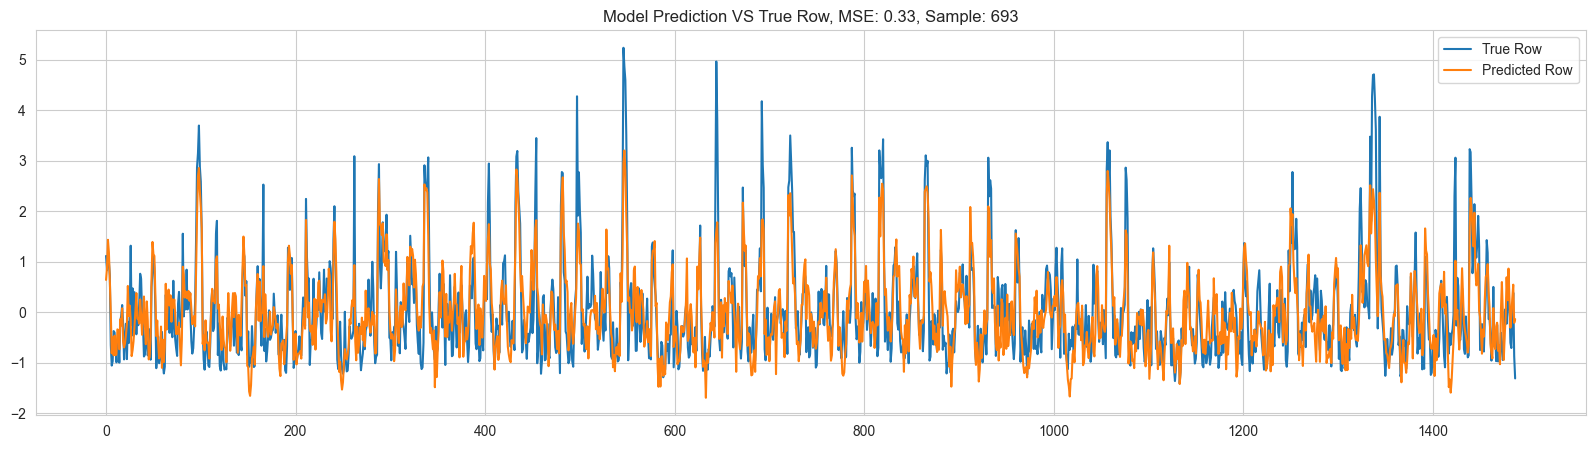

In [62]:
plot_sample(693)

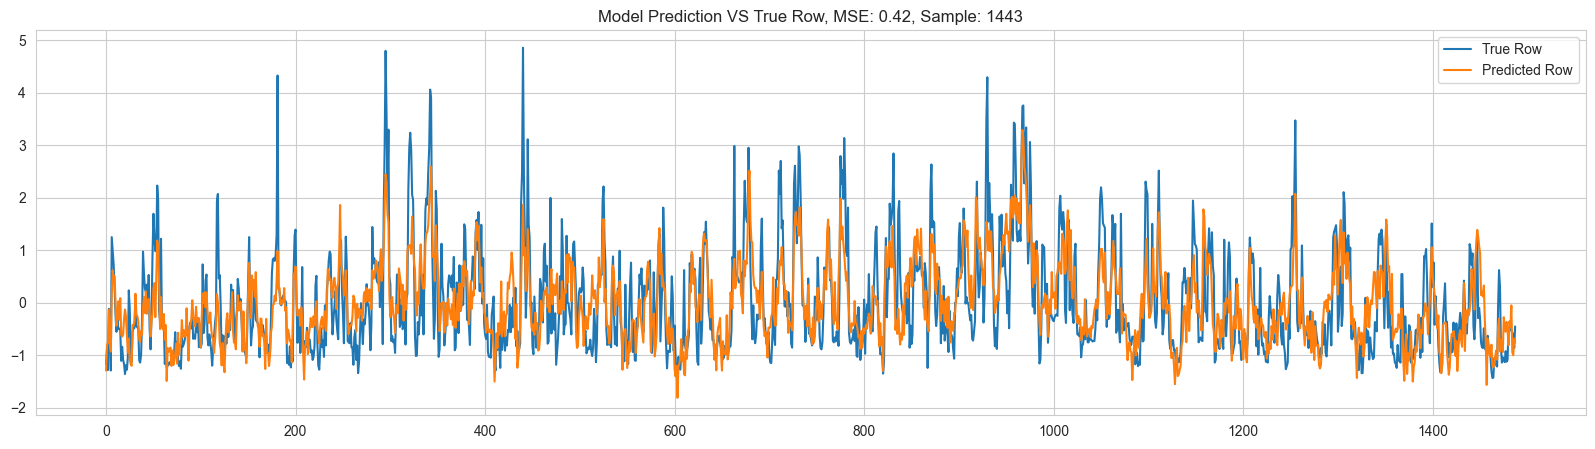

In [63]:
plot_sample(1443)

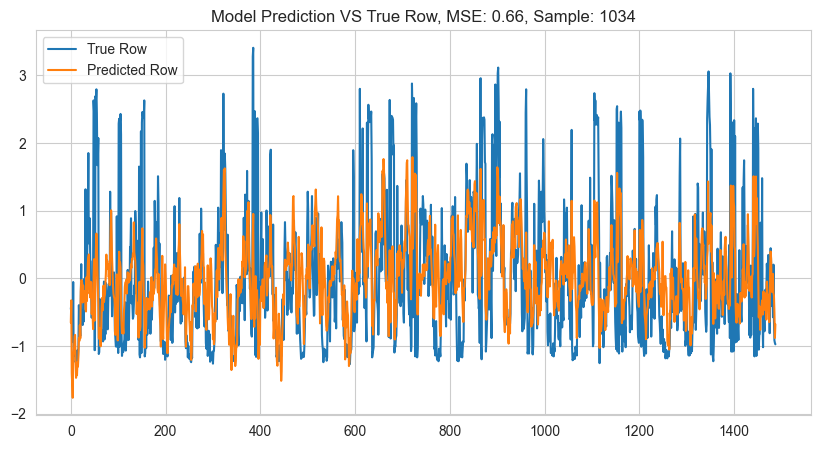

In [104]:
def plot_sample(sample):
    _, ax = plt.subplots(figsize=(10, 5))
    ax.plot(data[sample], label='True Row')
    pred_row = reconstructed[sample]
    ax.plot(pred_row, label='Predicted Row')
    mse = np.linalg.norm(data[sample] - pred_row) ** 2 / len(data[sample])
    ax.set_title(f'Model Prediction VS True Row, MSE: {mse.round(2)}, Sample: {sample}')
    plt.legend()
    plt.show()
plot_sample(1034)